## Observations and Insights 

 #1. The first conclusion that can be taken away from this data is that there is a positive correlation (0.84) between average tumor volume and weight within the subject mice. This means that the heavier the test subject is, the larger its tumor seems to be. #2 The second conclusion that can be drawn from the data is the 2 drugs that had the most data collected on were Capomulin and Ramicane. #3 Lastly, from this data we can conclude that the 2 drugs that are more successful at reducing the size of a tumor are Capomulin and Ramicane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
merged_sets = pd.merge(mouse_metadata, study_results)

In [3]:
# Display the data table for preview
merged_sets.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
#checking for original mice count
dup= merged_sets.groupby("Mouse ID")
len(dup)

249

In [5]:
#Finding Mouse Count
mouse_id_count = merged_sets.loc[merged_sets.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
#seeing how many duplicates there are
# Optional: Get all the data for the duplicate mouse ID. 
how_many_mice= pd.DataFrame(mouse_id_count)
how_many_mice

,0
0,g989


In [6]:
#now dropping dublicates
dropped_dup= merged_sets[merged_sets['Mouse ID'].isin(mouse_id_count)==False]

In [7]:
#checking that duplicate was removed 
cleaned_data= dropped_dup.groupby("Mouse ID")
len(cleaned_data)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_drug= dropped_dup.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean= grouped_drug["Tumor Volume (mm3)"].mean()
drug_median= grouped_drug["Tumor Volume (mm3)"].median()
drug_variance= grouped_drug["Tumor Volume (mm3)"].var()
drug_sd= grouped_drug["Tumor Volume (mm3)"].std()
drug_sem= grouped_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_summary_table= pd.DataFrame({
    "Mean":drug_mean,
    "Median":drug_median,
    "Variance":drug_variance,
    "Standard Deviation":drug_sd,
    "SEM":drug_sem

})
tumor_summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
#half way already did it above by doing one groupby function 
grouped_drug= dropped_dup.groupby(["Drug Regimen"])
second_summary= grouped_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
second_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

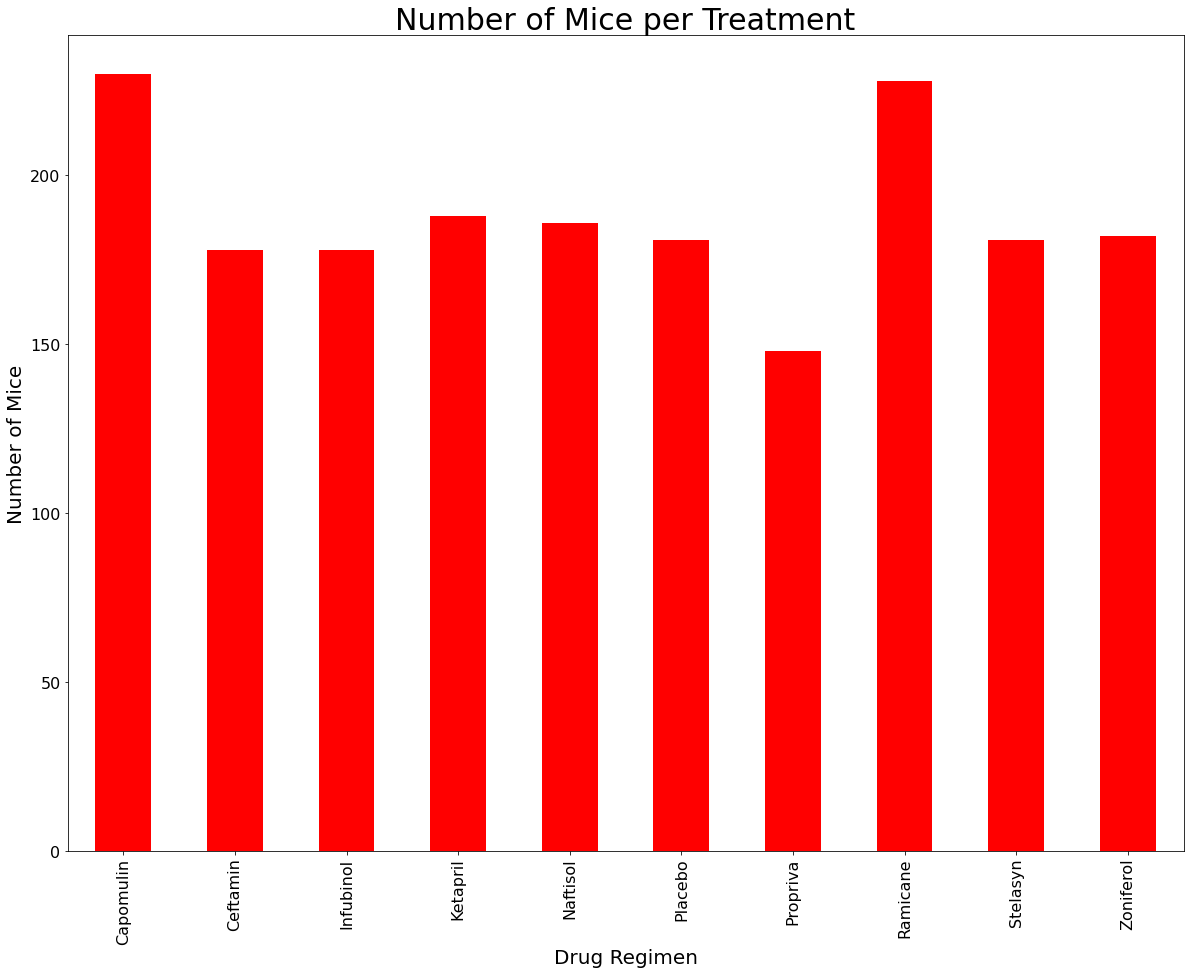

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#start by grouping by drug regimen and mouse id 
treated_mice= dropped_dup.groupby(["Drug Regimen"]).count()["Mouse ID"]
#created the bar graph
plotting_treated= treated_mice.plot.bar(figsize=(20,15),color='r', fontsize= 16)
treated_mice
#add titles and labels 
plt.xlabel("Drug Regimen",fontsize = 20)
plt.ylabel("Number of Mice",fontsize = 20)
plt.title("Number of Mice per Treatment",fontsize = 30)

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#create x_axis
x_axis_mice= np.arange(len(treated_mice))

In [12]:
#Create your y_axis 
treated_mice
y_axis_mice= (treated_mice.tolist())
y_axis_mice

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0.5, 1.0, 'Number of Mice per Treatment')

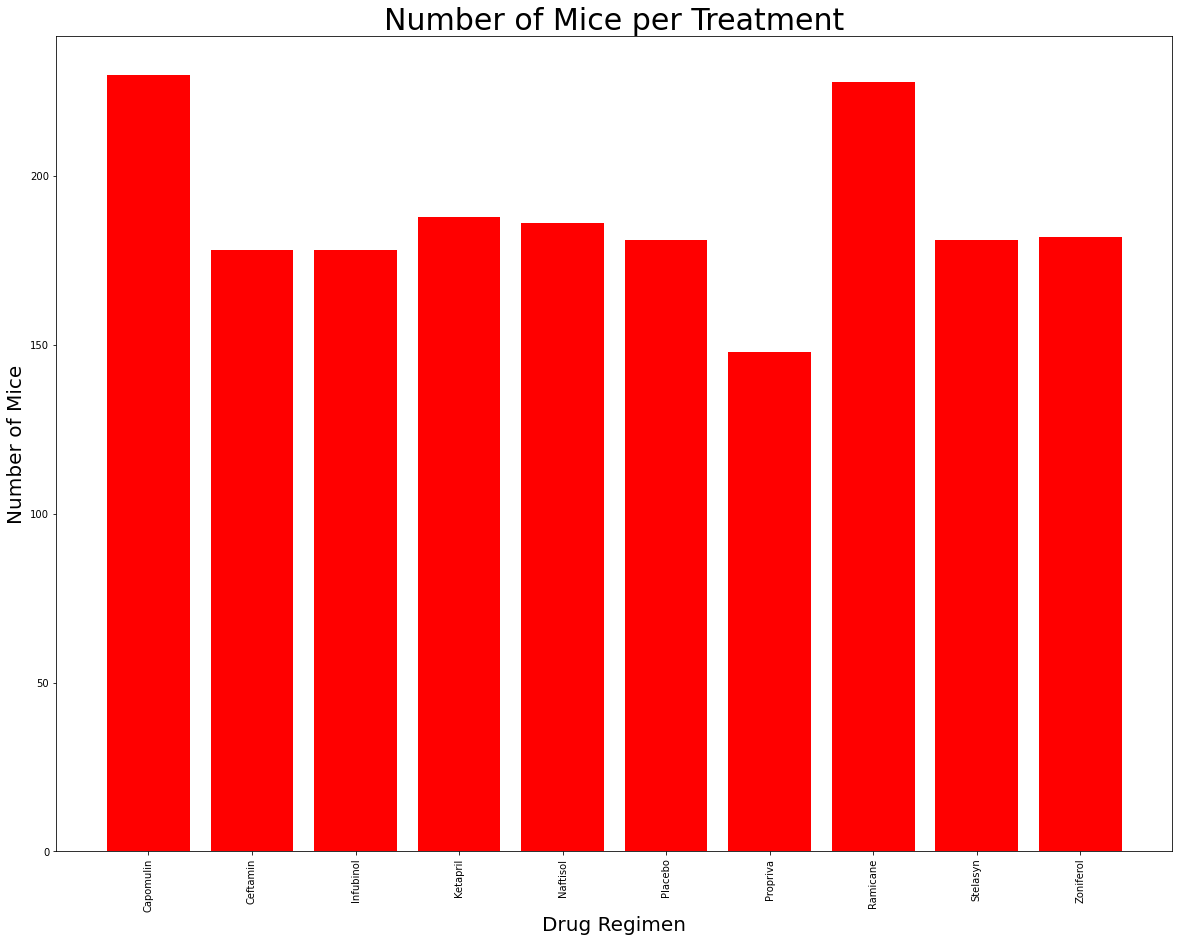

In [13]:
#Plot your graph
plt.figure(figsize=(20,15))
plt.bar(x_axis_mice, y_axis_mice, color='r')
ticks = [value for value in x_axis_mice]
#put ticks on x-axis to match drug regimens
plt.xticks(ticks, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlabel("Drug Regimen",fontsize = 20)
plt.ylabel("Number of Mice",fontsize = 20)
plt.title("Number of Mice per Treatment",fontsize = 30)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#first you must groupby Gender and Mouse ID
pie_gender= dropped_dup.groupby(["Mouse ID", "Sex"])
gender_data= pd.DataFrame(pie_gender.size())

#calculate for total amount of male and female mice
genders= pd.DataFrame(gender_data.groupby(["Sex"]).count())
#put calculation in a new columns
genders.columns=["Gender Count"]
genders
#percentages of for the pic graph 
#123+125= 248
#123/248= 0.496 *100= 49.6%
#125/248= 0.5040 *100 = 50.4%



,Gender Count
Sex,
Female,123
Male,125


In [15]:
df = pd.DataFrame({'gender count': [50.40, 49.6]},
                  index=['Male', 'Female'])

Text(0.5, 1.0, 'Male vs Female Mice Count')

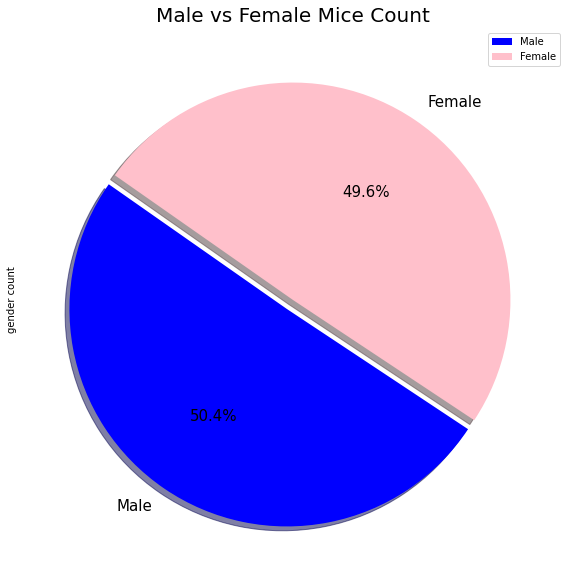

In [16]:
#pie plot using pandas 
plot_1= df.plot.pie(y='gender count',figsize=(10, 10),colors= ['blue','pink'],autopct="%1.1f%%",fontsize=15, explode = (0.05, 0), startangle=145, shadow= True)

plt.title('Male vs Female Mice Count',fontsize = 20)



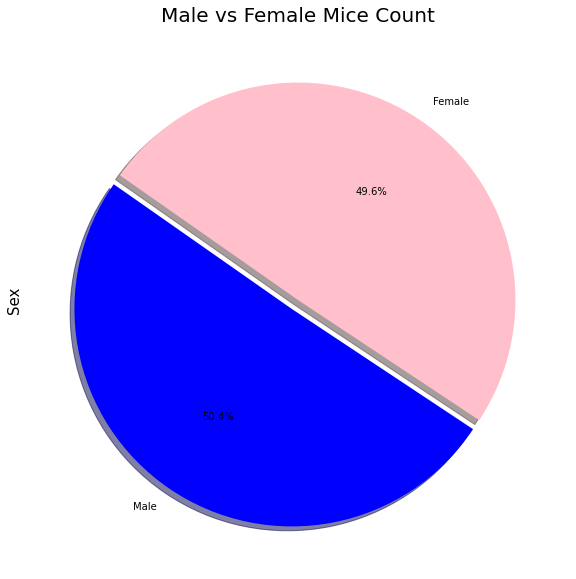

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labeling pie sections
labels= ["Male","Female"]
#put in sizes found up above 
#set all info
sizes = [50.40, 49.6]
colors=['blue','pink']
explode=(0.05, 0)
plt.title('Male vs Female Mice Count',fontsize = 20)
plt.ylabel('Sex',fontsize = 15)
#Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145,)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Capomulin
Capomulin_data= dropped_dup.loc[dropped_dup["Drug Regimen"] == "Capomulin",:]
#Ramicane
Ramicane_data= dropped_dup.loc[dropped_dup["Drug Regimen"] == "Ramicane",:]
#Infubinol
Infubinol_data= dropped_dup.loc[dropped_dup["Drug Regimen"] == "Infubinol",:]
#Ceftamin
Ceftamin_data= dropped_dup.loc[dropped_dup["Drug Regimen"] == "Ceftamin",:]


In [19]:
len(Capomulin_data)

230

In [20]:
len(Ramicane_data)

228

In [21]:
len(Infubinol_data)

178

In [22]:
len(Ceftamin_data)

178

In [23]:
#finding last (greatest) of each drug 
capomulin_last= Capomulin_data.groupby('Mouse ID').max()['Timepoint']
#Merging 
capomulin_last1 = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_last1, dropped_dup, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()
#finding tumor volume for cap 
tumor_volume_capomulin= capomulin_merge["Tumor Volume (mm3)"]
#find quartiles and IQR for each drug 
quartiles =tumor_volume_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [24]:
#Ramicane
ramicane_last= Ramicane_data.groupby('Mouse ID').max()['Timepoint']
#Merging 
ramicane_last1 = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_last1, dropped_dup, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()
#finding tumor volume for cap 
tumor_volume_ramicane= ramicane_merge["Tumor Volume (mm3)"]
quartiles =tumor_volume_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


In [25]:
#Infubinol
infubinol_last= Infubinol_data.groupby('Mouse ID').max()['Timepoint']
#Merging 
infubinol_last1 = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_last1, dropped_dup, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()
#finding tumor volume for cap 
tumor_volume_infubinol= infubinol_merge["Tumor Volume (mm3)"]
quartiles =tumor_volume_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [26]:
#Ceftamin
ceftamin_last= Ceftamin_data.groupby('Mouse ID').max()['Timepoint']
#Merging 
ceftamin_last1 = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_last1, dropped_dup, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()
#finding tumor volume for cap 
tumor_volume_ceftamin= ceftamin_merge["Tumor Volume (mm3)"]
quartiles =tumor_volume_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd33817c130>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd33817c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd33816cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd33817ceb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd338186250>],
 'means': []}

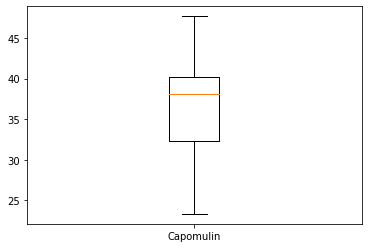

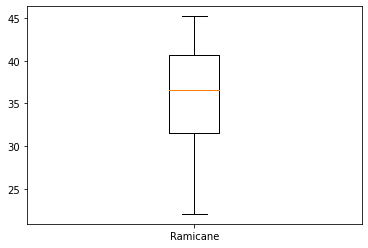

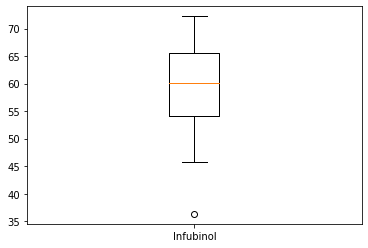

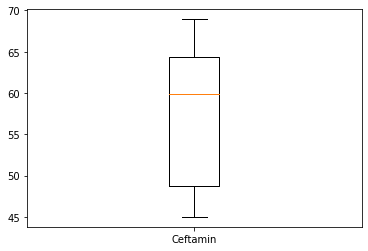

In [27]:
#Plot each tumor volume 
plot_1= [tumor_volume_capomulin]
label_1= ['Capomulin']
fig1, ax1= plt.subplots()
ax1.boxplot(plot_1, labels=label_1)

plot_2= [tumor_volume_ramicane]
label_2= ['Ramicane']
fig1, ax2= plt.subplots()
ax2.boxplot(plot_2, labels=label_2)

plot_3= [tumor_volume_infubinol]
label_3= ["Infubinol"]
fig1, ax3= plt.subplots()
ax3.boxplot(plot_3, labels=label_3)


plot_4= [tumor_volume_ceftamin]
label_4= ["Ceftamin"]
fig1, ax4= plt.subplots()
ax4.boxplot(plot_4, labels=label_4)




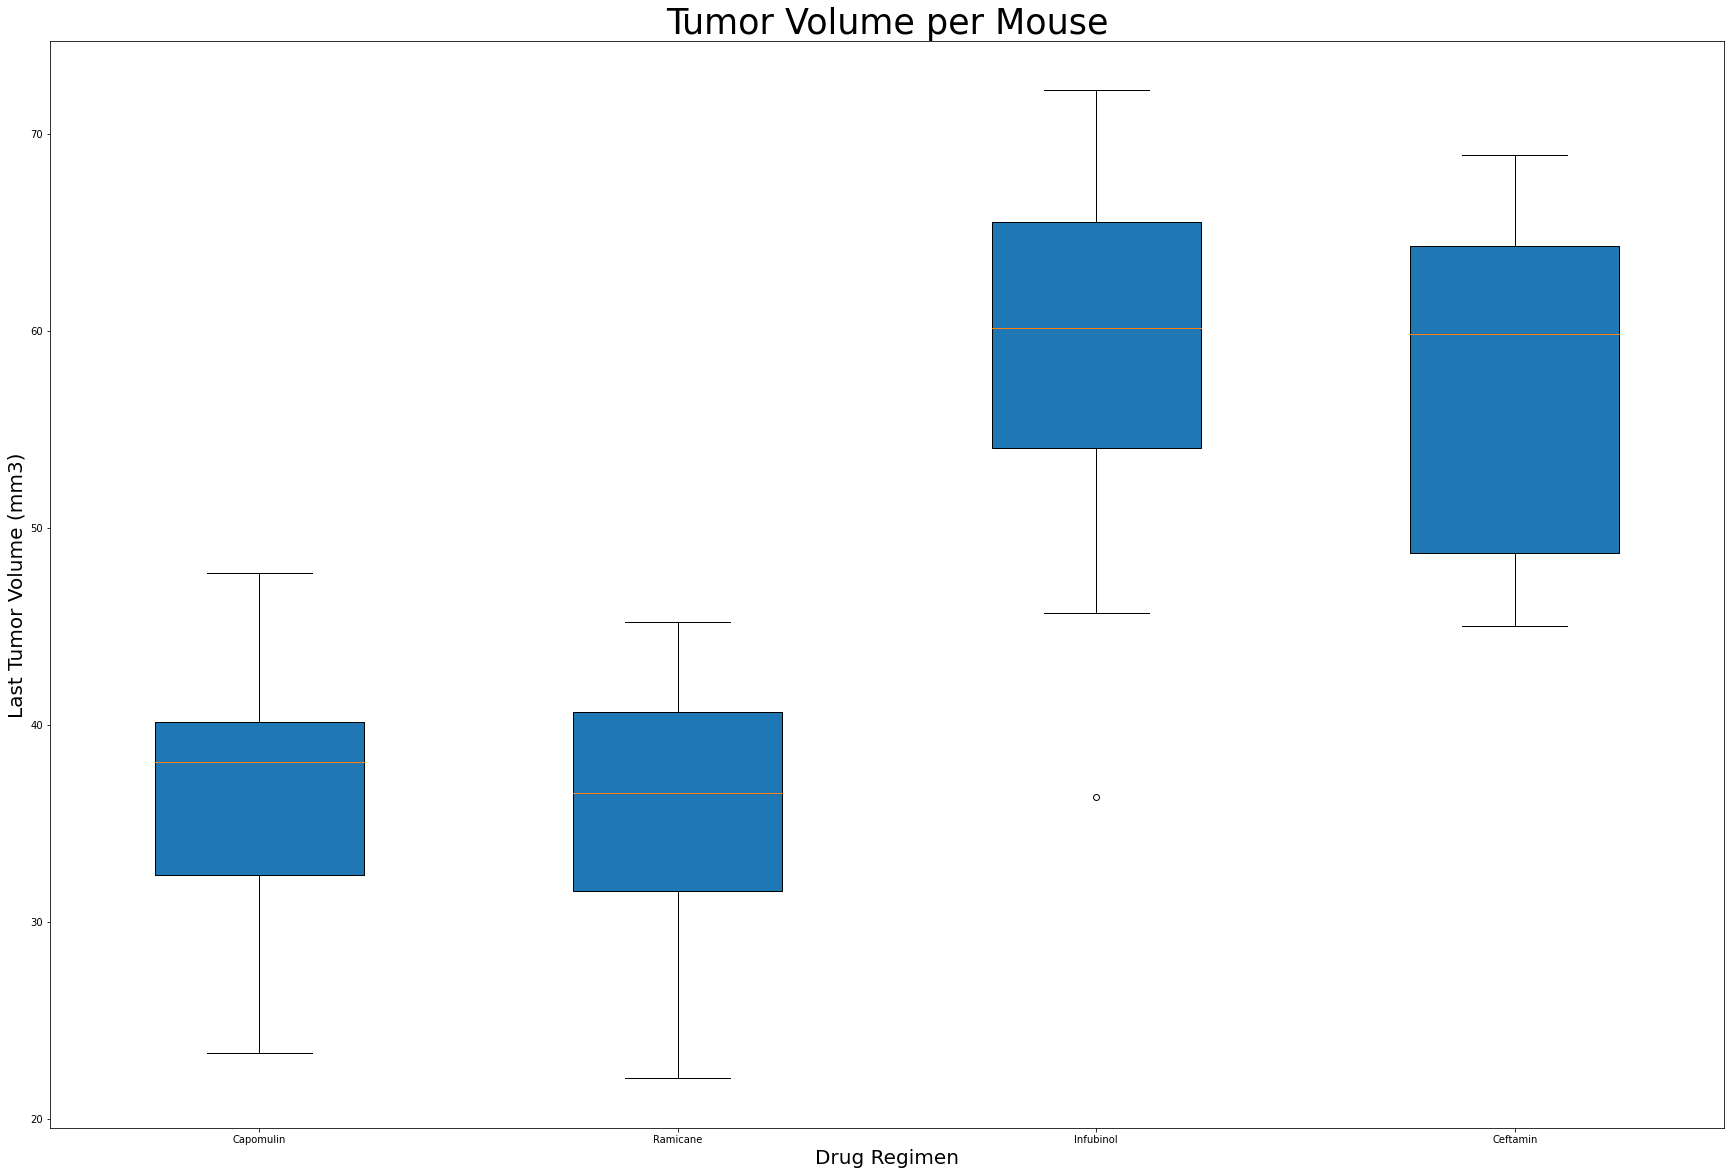

In [28]:
#Now you can make them pretty
#Plot the 4 box plots under one figure 
#Make a list of all calculated tumor data
box_plot_data= [tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftamin]
#create corresponding labels
Drug_Regimens= ['Capomulin','Ramicane','Infubinol','Ceftamin']

#Plot and add aesthetics 
fig1, ax1 = plt.subplots(figsize=(30, 20))
ax1.set_title('Tumor Volume per Mouse',fontsize =35)
ax1.set_ylabel('Last Tumor Volume (mm3)',fontsize = 20)
ax1.set_xlabel('Drug Regimen',fontsize = 20)
ax1.boxplot(box_plot_data, labels=Drug_Regimens, widths = 0.5, patch_artist=True,vert=True)
plt.show()

## Line and Scatter Plots

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [30]:
#decifer how many markers the graph will have to check later
chosen_mouse= Capomulin_data.loc[Capomulin_data["Mouse ID"]== 's185',:]
len(chosen_mouse)

10

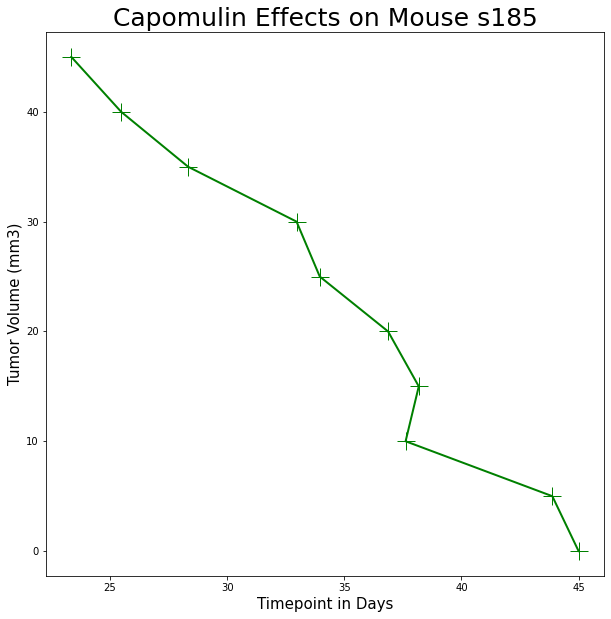

In [39]:
x_axis= chosen_mouse["Tumor Volume (mm3)"]
values= chosen_mouse["Timepoint"]
plt.title("Capomulin Effects on Mouse s185", fontsize= 25)
plt.xlabel('Timepoint in Days',fontsize =15)
plt.ylabel('Tumor Volume (mm3)',fontsize =15)

plt.plot(x_axis, values,linewidth=2,markersize=18,marker="+",color="green")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

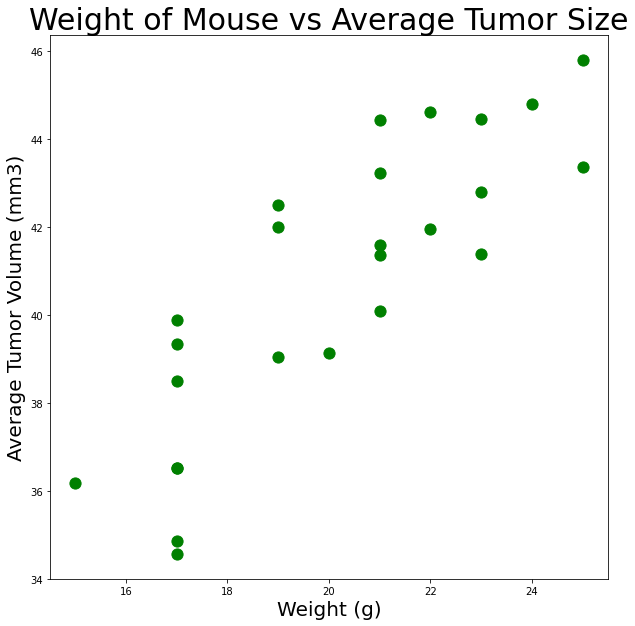

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#find the mean 
c_mean =Capomulin_data.groupby(['Mouse ID']).mean()

#set aesthetics 
plt.title("Weight of Mouse vs Average Tumor Size", fontsize=30)
plt.xlabel('Weight (g)',fontsize=20)
plt.ylabel('Average Tumor Volume (mm3)',fontsize=20)
markersize= 20

#plug in the mean and graph 
plt.scatter(c_mean['Weight (g)'],c_mean['Tumor Volume (mm3)'], s=125, color="green")

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient: st.pearsonr 
avg_tumor_vol= c_mean['Tumor Volume (mm3)']
avg_weight= c_mean['Weight (g)']
#correlation 
correlation_2 = (st.pearsonr(avg_weight, avg_tumor_vol))
final_c= correlation_2[0]
final_c


0.8419363424694717

In [76]:
#put it in a string 
print(f"The correlation between mouse weight and average tumor volume is {final_c}!!!!")

The correlation between mouse weight and average tumor volume is 0.8419363424694717!!!!


In [68]:
x_axis= avg_weight
y_axis= avg_tumor_vol
m=st.linregress(x_axis, y_axis)
m

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

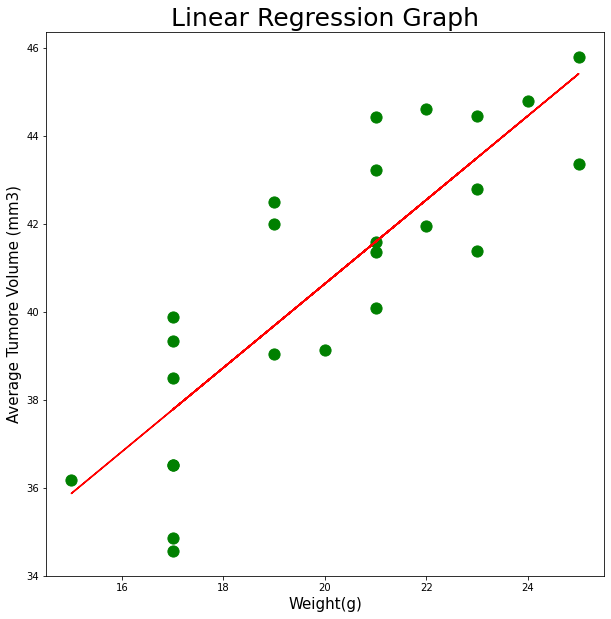

In [73]:
#bring down info found from above cell 
slope=0.9544396890241045
intercept=21.552160532685015
#classic y=mx+b formula 
y= (avg_weight)*slope+intercept

#graph aesthetics 
plt.title("Linear Regression Graph", fontsize=25)
plt.xlabel('Weight(g)', fontsize=15)
plt.ylabel('Average Tumore Volume (mm3)', fontsize=15)

#plot scatter plot from previous problem 
plt.scatter(c_mean['Weight (g)'],c_mean['Tumor Volume (mm3)'], s=125, color="green")
#plot linear line w y 
plt.plot(avg_weight,y,color="red")

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()
